# <h1 style="color: darkblue; text-align: center;">Influencing the Narrative: Sentiment Analysis of Donald Trump's Tweets</h1>

<p style="text-align: center;">
<strong>Andrew Schweitzer</strong><br>
<strong>2024-08-02</strong>
</p>

## **Introduction**

With the 2024 presidential election approaching, people are looking back at former President and 2024 Republican presidential nominee Donald Trump's social media usage during his past presidential term. During his term, Donald Trump was well known for his Twitter antics where he delivered controversial statements and announded policy changes. In 2017, the Department of Justice argued that former President Trump's tweets should be considered official statements, emphasizing their importance. Thus, it is crucial to understand how Trump used Twitter and influenced public discourse since he started his presidency in 2016. **Donald Trump's frequent Twitter usage, both during and after his presidency, raises the questions: How did the sentiment of Trump's tweets impact public opinion? How has the sentiment of Trump's tweets changed over time, and are there any common themes associated with positive, neutral, and negative sentiments?**

This study aims to examine and analyze Donald Trump's tweets since 2016 to answer these questions. We will explore the trends and shifts in sentiment of Trump's tweets throughout his presidency and analyze the public's reaction. We will also look for topics or themes that are frequently associated with positive, negative, or neutral sentiment in Trump's tweets through text analysis. This project seeks to provide insights into Trump's use of Twitter and how it might influence the future political landscape.

## **Methods**

### The Data

We will examine these topics by focusing on all of Donald Trump's tweets (including deleted tweets since September 2016) gathered on [Trump Twitter Archive](https://www.thetrumparchive.com/), a site that checks for Trump's Twitter activity every minute, entering it into a database. The site contains all of Trump's tweets since 2009. However, it only began tracking deleted tweets since September 2016, when the site was created. This dataset also contains user engagement for each of Trump's tweets such as retweets and likes. However, The tweets data selected show important information about all of Trump's tweets and the public's opinion so that we can fully analyze the Trump's and the public's sentiment. According to the Trump Twitter Archive, the site is a reputable source as it is frequently referenced by FactCheck.org, PolitiFact, Snopes, Wikipedia, and most news outlets. 

The dataset consists of 56,571 observations (tweets) and 9 columns. However, we will filter for tweets after Trump became elected, so the observations will decrease. After preprocessing, the 9 columns along with their data types are id (int), text (string), isRetweet (int), isDeleted (int), device (string), favorites (int), retweets (int), date (datetime), isFlagged (int). The id variable is a unique identifier for each tweet and is irrelevant for an analysis, so we will primarily use the other 8 variables in this study. The text variable contains the contents of Donald Trump's tweet. The isRetweet is a dummy variable with 0 corresponding to Trump's tweet not being a retweet and 1 corresponding to the tweet being a retweet. The isDeleted is also a dummy variable with 0 corresponding to the tweet not being deleted and 1 corresponding to the tweet being deleted. The device variable displays the type of device the tweet was published on. The favorites variable corresponds to the number of users who favorited (liked) the tweet. The retweets variable corresponds to the number of users who retweeted the tweet. The date variable is the date and time the tweet was published. The isFlagged variable is a dummy variable with 0 corresponding to the tweet not being flagged and 1 corresponding to the tweet being flagged. 

Link to dataset on Google Drive (Retrieved on 2024-07-29): [Trump Twitter Archive - CSV File](https://drive.google.com/file/d/1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6/view)

The code cells below prepare our data for analysis by preprocessing our variables and filtering tweets since November 8, 2016, when Donald Trump became officially elected.

In [1]:
import pandas as pd
tweets = pd.read_csv('tweets_01-08-2021.csv')
tweets.drop(columns=['id'], inplace=True)

In [2]:
print(tweets.isna().sum()) # check for any NAs

text         0
isRetweet    0
isDeleted    0
device       0
favorites    0
retweets     0
date         0
isFlagged    0
dtype: int64


In [3]:
# change variable types
tweets['text'] = tweets['text'].astype('string')
tweets['isRetweet'] = tweets['isRetweet'].replace({'f': 0, 't': 1})
tweets['isDeleted'] = tweets['isDeleted'].replace({'f': 0, 't': 1})
tweets['isFlagged'] = tweets['isFlagged'].replace({'f': 0, 't': 1})
tweets['device'] = tweets['device'].astype('string')
tweets['date'] = pd.to_datetime(tweets['date'])

In [4]:
# add new variable: word count
def word_count(text):
    return len(text.split())

tweets['word_count'] = tweets['text'].apply(word_count)

In [5]:
tweets.dtypes

text                  string
isRetweet              int64
isDeleted              int64
device                string
favorites              int64
retweets               int64
date          datetime64[ns]
isFlagged              int64
word_count             int64
dtype: object

Some tweets include links to pictures, videos, and other tweets, which do not contribute to the sentiment analysis in this study. To prepare our data for analysis, links from tweets have been removed. Additionally, observations that only include links have been removed from this dataset. Removing these links will help reduce noise in the dataset so that the focus remains on the actual text content of Trump's tweets. Effectively, the URLs have been removed to enhance accuracy and prevent any skewness in the sentiment analysis.

In [6]:
import re
def remove_links(text):
    url_pattern = r'http\S+|www\S+|https\S+'
    return re.sub(url_pattern, '', text)

tweets['text'] = tweets['text'].apply(remove_links)
tweets = tweets[tweets['text'].str.len() > 0] # remove any observations that were only URLs

In [7]:
tweets_full = tweets
tweets_before = tweets[tweets['date'] < pd.Timestamp('2016-11-08')]
tweets = tweets[tweets['date'] > pd.Timestamp('2016-11-08')] # filtered dataset on focus time period

In [8]:
tweets.shape

(25391, 9)

After preprocessing our data, the dataset has 25,391 observations and 9 variables. We added a new int variable, word_count, which gives the total number of words in the tweet.

In [9]:
tweets.head()

,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,word_count
1,I was thrilled to be back in the Great city of...,0,0,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,0,43
2,RT @CBS_Herridge: READ: Letter to surveillance...,1,0,Twitter for iPhone,0,7396,2020-01-17 03:22:47,0,21
3,The Unsolicited Mail In Ballot Scam is a major...,0,0,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,0,49
4,RT @MZHemingway: Very friendly telling of even...,1,0,Twitter for iPhone,0,9081,2020-01-17 13:13:59,0,22
5,RT @WhiteHouse: President @realDonaldTrump ann...,1,0,Twitter for iPhone,0,25048,2020-01-17 00:11:56,0,18


### Analytical Process

Before conducting our sentiment analysis, we will explore the data to better understand and receive context. In this study, we created various plots (scatter plots, bar charts, line charts, box plots) to explore relationships and trends in the data. Then we analyzed the visualizations to gain insights into tweet engagement, distributions, etc.

For our sentiment analysis we will be using VADER (Valence Aware Dicionary and Sentiment Reasoner) which is a lexicon tool optimized for analysing sentinemtn expressed in social media. Each tweet was processed using VADER to assign a sentiment score ranging from -1 (very negative) to 1 (very positive). The scores were then analyzed to determine the distribution of sentiments, identify common words contributing to positive and negative sentiments, and examine changes in sentiment over time.

By combining sentiment analysis with an exploratory data analysis, this study provides a detailed examination of Donald Trump's Twitter activity and its impact on public discourse. The findings highlight the significance of Trump's tweets in shaping public opinion and political engagement.

## Results

### Exploratory Data Analysis

Before diving into a more focused analysis, we need to first understand our data. First, we will take a look at the summary statistics for the numerical variables. After getting an idea of the data, we can then visualize our data to further deepen our understanding.

In [10]:
# Summary statistics
tweets.describe()

,isRetweet,isDeleted,favorites,retweets,isFlagged,word_count
count,25391.000000,25391.000000,2.539100e+04,25391.000000,25391.000000,25391.000000
mean,0.381159,0.041944,5.658646e+04,16940.568351,0.010240,24.497735
std,0.485681,0.200465,7.360482e+04,14770.602454,0.100675,13.770026
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000e+00,8265.000000,0.000000,15.000000
50%,0.000000,0.000000,4.713000e+04,13379.000000,0.000000,22.000000
75%,1.000000,0.000000,8.318300e+04,20683.500000,0.000000,34.000000
max,1.000000,1.000000,1.869706e+06,408866.000000,1.000000,60.000000


From the summary statistics we can see there are 25,391 tweets in our dataset. After converting the isRetweeted, isDeleted, isFlagged columns to integer dummy variables, we can observe their means as percentages. About 38% of Trump's tweets are retweets, about 4% of tweets are deleted, and 1% of tweets are flagged. The summary statistics also give insight into user engagement such as favorites and retweets. On average, Trump's tweets receive 56,586 favorites with a standard deviation of 73,604. This means that his tweets vary significantly in their like counts. On average, Trump's tweets receive 16,940 retweets with a standard deviation of 14,770 retweets. Trump's tweets also widely vary in their retweet counts given by the large standard deviation. Lastly, Trump averages about 25 words per tweet with a standard deviation of around 14 words. To deepen our understanding, we will now visualize the data with plots, as graphs often convey insights more effectively than tables.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

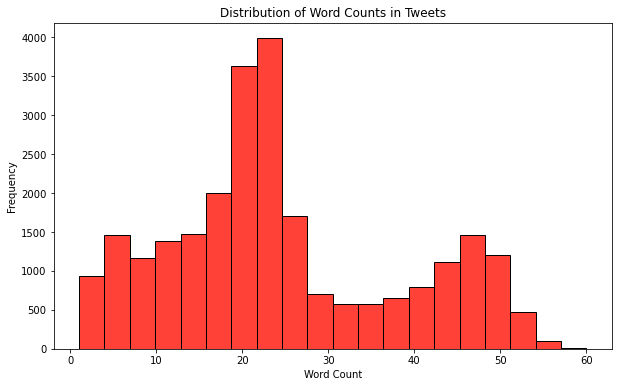

In [12]:
# distribution of word count
plt.figure(figsize=(10, 6))
plt.hist(tweets['word_count'], bins=20, edgecolor='black', color = '#ff4137')
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

This histogram displays the frequency distribution of word counts in Donald Trump's tweets. In this graph, the x-axis represents the word count of Trump's tweets and the y-axis represents the frequency of tweets for each word count range. The main takeaway from this graph is that most of Trump's tweets contain around 20 to 25 words and there is a steep drop off after. However, it is interesting that there is a small peak centered at around 45 words. This graph suggests that Trump's tweets are generally concise.

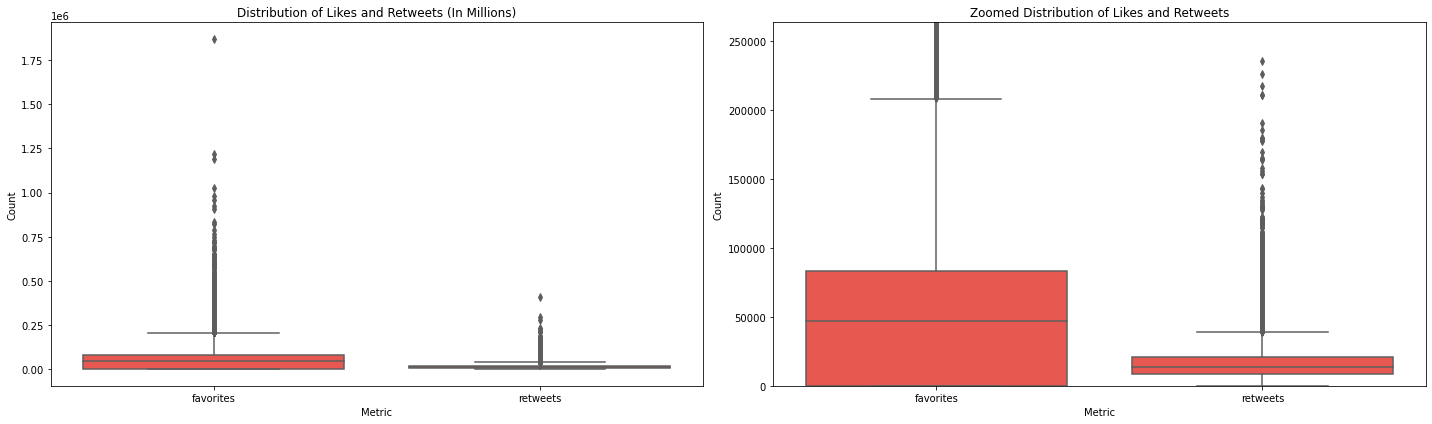

In [13]:
# box plots of engagement metrics
data_long = pd.melt(tweets[['favorites', 'retweets']], var_name='Metric', value_name='Count')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# box plot
sns.boxplot(x='Metric', y='Count', data=data_long, color = '#ff4137', ax=axs[0])
axs[0].set_title('Distribution of Likes and Retweets (In Millions)')
axs[0].set_xlabel('Metric')
axs[0].set_ylabel('Count')

# zoomed box plot
sns.boxplot(x='Metric', y='Count', data=data_long, color = '#ff4137', ax=axs[1])
axs[1].set_title('Zoomed Distribution of Likes and Retweets')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('Count')

axs[1].set_ylim(data_long['Count'].quantile(0.01), data_long['Count'].quantile(0.99))
plt.tight_layout()
plt.show()

The graph on the left illustrates a set of box plots representing favorites and retweets; however, the boxes are squished because of the amount of outliers. We can see that there are some tweets with over a million likes. So, the right plot aims to better illustrate the distribution by showing the graph from the left, but on a smaller scale. This zoomed in plot lets us take a closer look at the majority of the data. We can observe from the box plots that there is a high level of variability in user engagement, with a significant number of outliers indicating some of Donald Trump's tweets recieved disproportionately high interactions. Lastly, the median likes are retweets are much less than the maximum values, showing most tweets receiving moderate engagement.

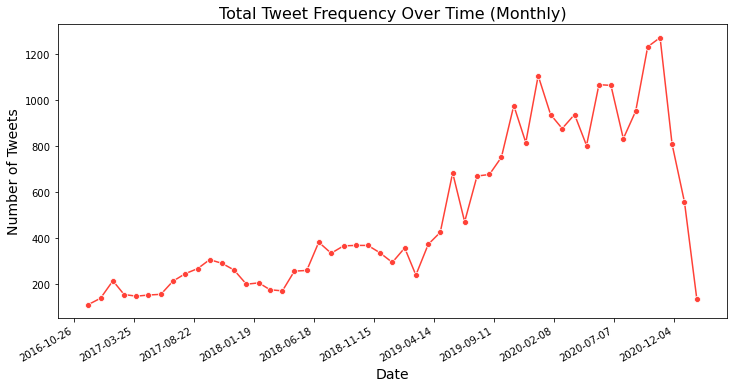

In [14]:
# tweet frequency graph over time
tweets.set_index('date', inplace=True)
monthly_tweet_counts = tweets.resample('M').size() # aggregate monthly tweets
monthly_tweet_counts = monthly_tweet_counts.reset_index()
monthly_tweet_counts.columns = ['Date', 'Tweet_Count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Tweet_Count', data=monthly_tweet_counts, marker='o', color='#ff4137')

plt.title('Total Tweet Frequency Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) 
plt.gcf().autofmt_xdate()  # rotate labels
plt.show()
tweets = tweets.reset_index()

Here is a line graph that tracks the total number of tweets Trump published each month starting from November 2016 to January 2021. In this graph the x-axis represents the date of tweet posting and the y-axis shows the number of tweets per month. We can see in the graph that there are peaks in tweet frequency throughout 2020. There is a general upward trend where tweet frequency picks up heavily in 2019 and peaks in 2020. This trend suggests Trump's tweeting activity escalated immensely due to significant political events and crises (COVID-19). 

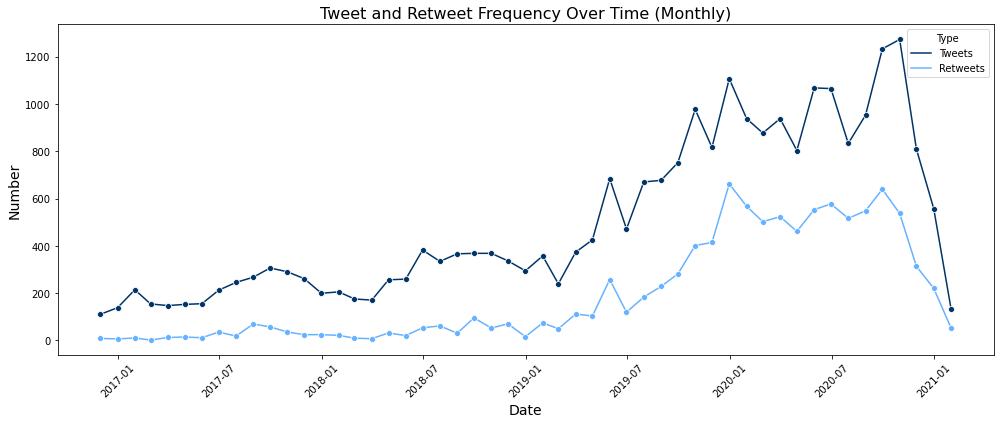

In [15]:
tweets['date'] = pd.to_datetime(tweets['date'])

# Set 'date' as the index
tweets.set_index('date', inplace=True)

# Aggregate duplicates and count tweets and retweets
tweets_aggregated = tweets.groupby([pd.Grouper(freq='D')]).agg({
    'isRetweet': 'sum',  # Sum retweets
    'text': 'count'      # Count tweets
}).rename(columns={'isRetweet': 'Retweets', 'text': 'Tweets'})

# Resample by month
monthly_tweet_counts = tweets_aggregated.resample('M').sum().reset_index()

# Create a 'Type' column for plotting
monthly_tweet_counts_melted = pd.melt(monthly_tweet_counts, id_vars=['date'], 
                                      value_vars=['Tweets', 'Retweets'], 
                                      var_name='Type', value_name='Count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_tweet_counts_melted, x='date', y='Count', hue='Type', marker='o', palette=['#003366', '#66B2FF'])

# Add titles and labels
plt.title('Tweet and Retweet Frequency Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

This is a line chart that illustrates the number of tweets and retweets per month from late 2016 to early 2021. Both tweets and retweets follow the same general pattern of an overall increasing trend over time. This indicates growing activity and engagement on Donald Trump's Twitter. We can observe notable spikes at various points, suggesting specific events that lead to higher Twitter activity. We can also see that the number of tweets is consistently exceeding the number of retweets meaning that Trump's original tweets were usually more frequent than his retweets. There is a huge  spike on this graph in late 2020 which corresponds with the U.S. presidential election period. We can see the activity sharply decline in early 2021 which corresponds to Trump's Twitter ban in January 2021.

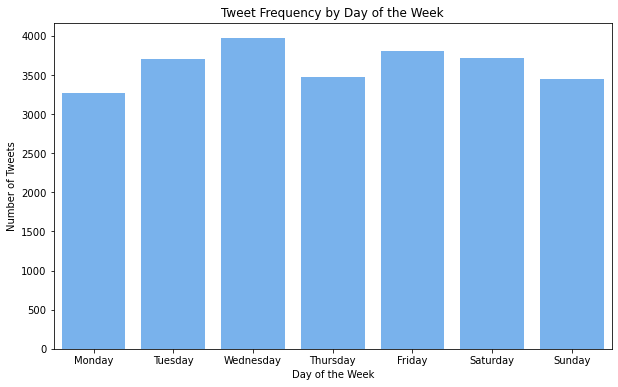

In [16]:
tweets = tweets.reset_index()
tweets['day_of_week'] = tweets['date'].dt.day_name()
tweet_counts = tweets['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

tweet_counts_df = tweet_counts.reindex(day_order).reset_index()
tweet_counts_df.columns = ['Day of Week', 'Tweet Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Tweet Count', data=tweet_counts_df, color = '#66B2FF')
plt.title('Tweet Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.show()

This is a bar chart which shows the total number of tweets posted by Donald Trump on each day of the week. There is not much variation among the days of the week, but we can see that Trump tweeted most frequently on Tuesday, Wednesday, and Friday. We can see dips in activity on Thrusday, Sunday, and Monday indicating that Trump is most active in the middle of the week.

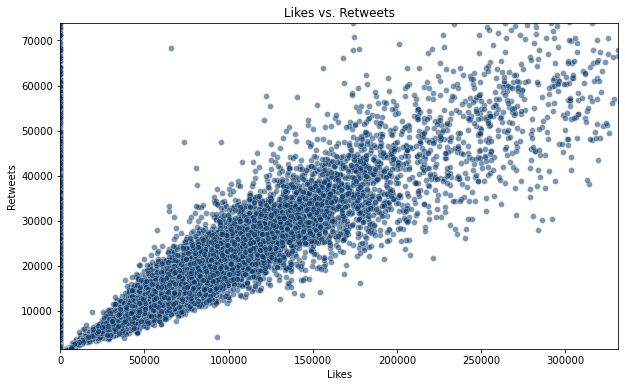

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tweets, x='favorites', y='retweets', alpha=0.5, color = '#003366')
plt.title('Likes vs. Retweets')

plt.xlim(tweets['favorites'].quantile(0.01), tweets['favorites'].quantile(0.99))
plt.ylim(tweets['retweets'].quantile(0.01), tweets['retweets'].quantile(0.99))

plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

This graph is a scatter plot which compares the number of favorites to the number of retweets for Donald Trump's tweets. Overall, we see a positive correlation between likes and retweets. We see from the distribution that there is a dense concentration at lower values, indicating that most tweets have fewer likes and retweets. The spread widens as the number of likes increases and we can observe that the relationship between likes and retweets for tweets with high engagement become more variable. We can see data points for tweets with 0 likes because these are Donald Trump's retweets which can not receive likes.

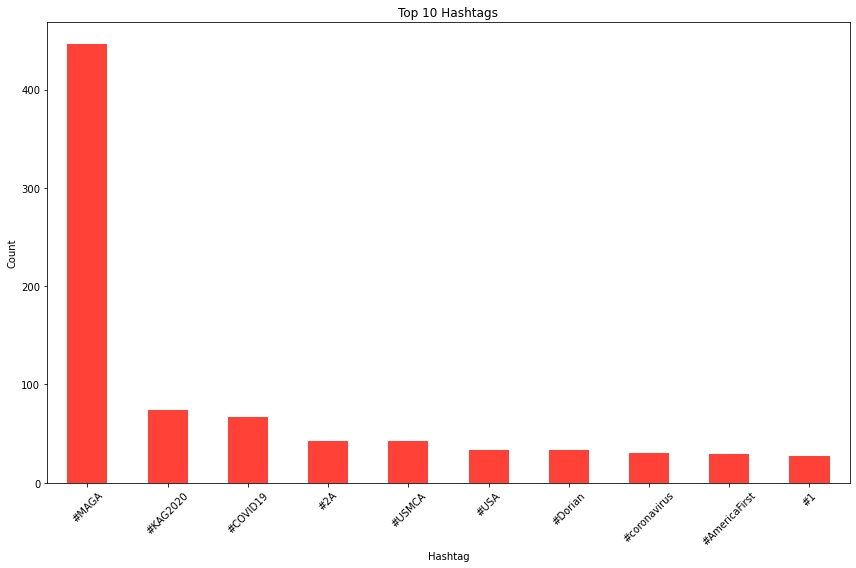

In [18]:
from collections import Counter

all_texts = ' '.join(tweets['text'].dropna())
hashtags = re.findall(r'#\w+', all_texts)
hashtag_counts = Counter(hashtags)
top_hashtags_df = pd.DataFrame(hashtag_counts.most_common(10), columns=['Hashtag', 'Count'])

plt.figure(figsize=(12, 8)) 
ax = plt.gca()  # Get current Axes
top_hashtags_df.plot(kind='bar', x='Hashtag', y='Count', legend=False, color='#ff4137', ax=ax)

plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is a graph showing the most frequent hashtags Donald Trump used in his tweets. The main hashtag that Donald Trump used was his slogan, MAGA (Make America Great Again). Then there is a steep decline in frequency for other hashtags.  

## Sentiment Analysis

After gaining a better understanding of our data, we can now move on to analyzing the sentiment of Donald Trump's tweets. 

In [19]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.cm import ScalarMappable

In [20]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # compound score: overall sentiment

tweets['sentiment_score'] = tweets['text'].apply(get_sentiment_score)

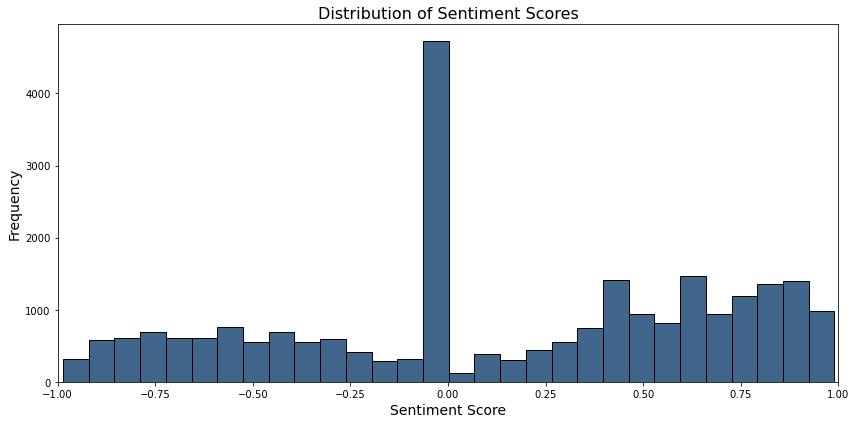

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(tweets['sentiment_score'], bins=30, kde=False, color='#003366')

plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-1, 1)  # Sentiment scores range from -1 to 1
plt.tight_layout()
plt.show()

This histogram depicts the frequency of sentiment scores computed from Donald Trump's tweets. Sentiment scores range from -1 (very negative) to 1 (very positive). The highest bar is at the sentiment score of 0, indicating neutral sentiment. A significant portion of Trump’s tweets are neutral, as indicated by the peak at 0. There is a notable spread of sentiment scores across the spectrum, with a relatively even distribution of both positive and negative sentiments. However, we can see a slight bias towards the positive sentiment score with more tweets being positive than negative. This suggests that Trump's tweets vary widely in tone, from very positive to very negative.

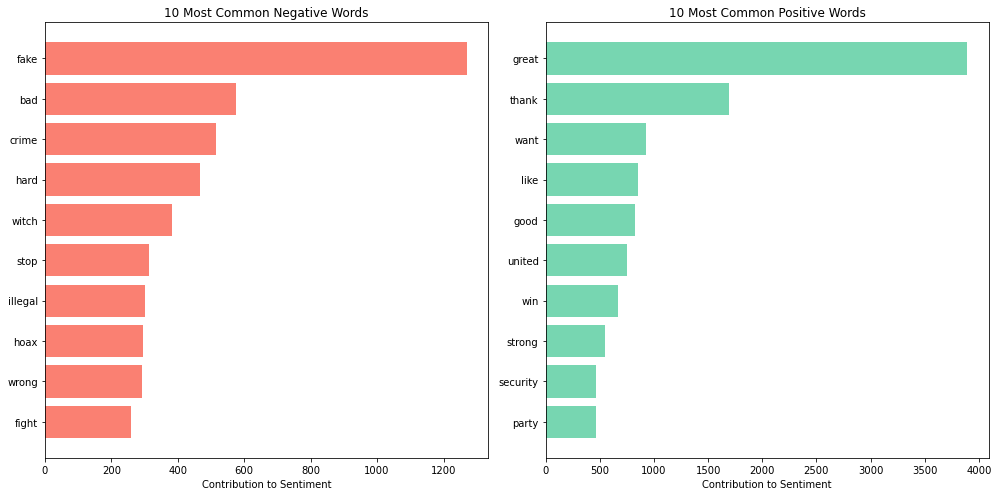

In [22]:
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word not in stop_words and word.isalnum()]
    return filtered_words

# Function to get sentiment
def get_sentiment(word):
    score = sid.polarity_scores(word)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return None

# Combine all text data
all_texts = ' '.join(tweets['text'])
words = preprocess_text(all_texts)

# Get sentiment for each word
positive_words = [word for word in words if get_sentiment(word) == 'positive']
negative_words = [word for word in words if get_sentiment(word) == 'negative']

# Count frequency
positive_freq = nltk.FreqDist(positive_words)
negative_freq = nltk.FreqDist(negative_words)

# Most common words
most_common_positive = positive_freq.most_common(10)
most_common_negative = negative_freq.most_common(10)

# Prepare data for plotting
pos_words = [word for word, count in most_common_positive]
pos_counts = [count for word, count in most_common_positive]
neg_words = [word for word, count in most_common_negative]
neg_counts = [count for word, count in most_common_negative]

# Plotting
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))

# Negative words
axes[0].barh(neg_words, neg_counts, color='salmon')
axes[0].set_xlabel('Contribution to Sentiment')
axes[0].set_title('10 Most Common Negative Words')
axes[0].invert_yaxis()

# Positive words
axes[1].barh(pos_words, pos_counts, color='#77d6b1')
axes[1].set_xlabel('Contribution to Sentiment')
axes[1].set_title('10 Most Common Positive Words')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

These bar charts highlight the ten most frequently used positive and negative words in Trump's tweets that contribute to positive and negative sentiment. Each bar in the bar chart represents the frequency of a specific word and we can see that negative words such as "fake," "bad," "crime" dominate the list. These are most likely associated with Donald Trump's criticisms and negative remarks. These words suggest why his tweets have been known to receive polarizing reactions from the public. Positive words like "great", "thank", and "want" are his most prevalent positive words. These words can be associated to his gratitude, possibly from winning the election. This makes sense because while he was campaigning, he used "great" numerous times to get his message across (MAGA). The frequent use of these positive words suggest that Trump used Twitter in an attempt to foster a positive image throughout his presidency.

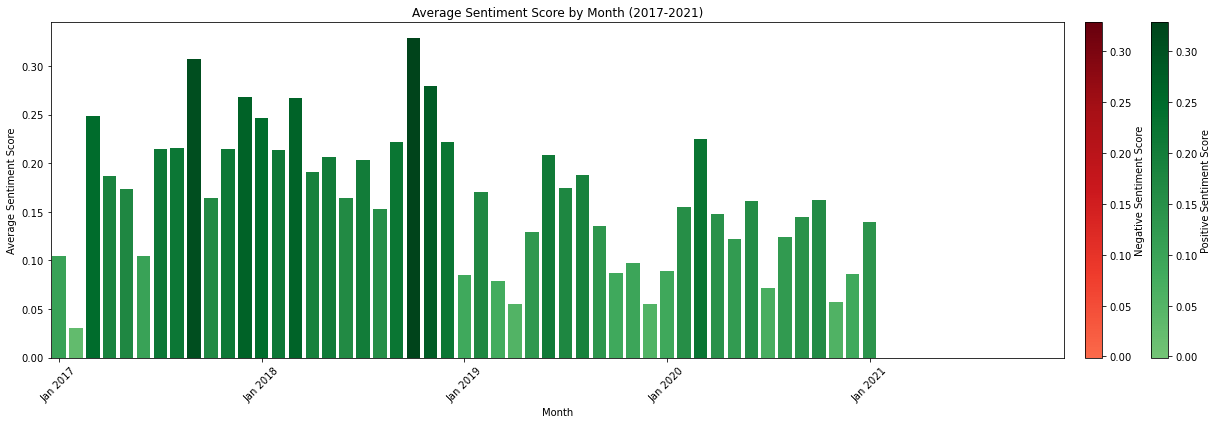

In [23]:
tweets['year_month'] = pd.to_datetime(tweets['date']).dt.to_period('M')
monthly_sentiment = tweets.groupby('year_month')['sentiment_score'].mean()
full_date_range = pd.period_range('2017-01', '2021-12', freq='M')
monthly_sentiment = monthly_sentiment.reindex(full_date_range, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
cmap_positive = plt.get_cmap('Greens')
cmap_negative = plt.get_cmap('Reds')
norm = TwoSlopeNorm(vmin=-0.0001, vcenter=0, vmax=monthly_sentiment.max())

colors = [cmap_positive(norm(value)) if value > 0 else cmap_negative(norm(value)) for value in monthly_sentiment.values]
bars = ax.bar(monthly_sentiment.index.astype(str), monthly_sentiment.values, color=colors)

ax.set_xlabel('Month')
ax.set_ylabel('Average Sentiment Score')
ax.set_title('Average Sentiment Score by Month (2017-2021)')
ax.set_xticks([f'{year}-01' for year in range(2017, 2022)])
ax.set_xticklabels([f'Jan {year}' for year in range(2017, 2022)])
plt.xticks(rotation=45)

ax.set_xlim(-0.5, len(monthly_sentiment) - 0.5)
sm_positive = ScalarMappable(cmap=cmap_positive, norm=norm)
sm_positive.set_array([0, 1])
cbar_positive = fig.colorbar(sm_positive, ax=ax, orientation='vertical', label='Positive Sentiment Score', pad=0.02, fraction=0.04)
cbar_positive.ax.set_position([0.93, 0.15, 0.02, 0.7])  

sm_negative = ScalarMappable(cmap=cmap_negative, norm=norm)
sm_negative.set_array([-1, 0])
cbar_negative = fig.colorbar(sm_negative, ax=ax, orientation='vertical', label='Negative Sentiment Score', pad=0.02, fraction=0.04)
cbar_negative.ax.set_position([0.90, 0.15, 0.02, 0.7]) 

plt.tight_layout(rect=[0, 0, 1.5, 1])  
plt.show()

This bar chart displays the average sentiment score of Trump’s tweets for each month from 2017 to early 2021. The color intensity represents the sentiment score, with darker shades indicating higher sentiment. There are noticeable fluctuations in average sentiment scores over the year; however, his monthly tweets are consistently positive throughout his presidency. For example, mid-2018 shows a significant positive peak, while early 2021 shows a decline.

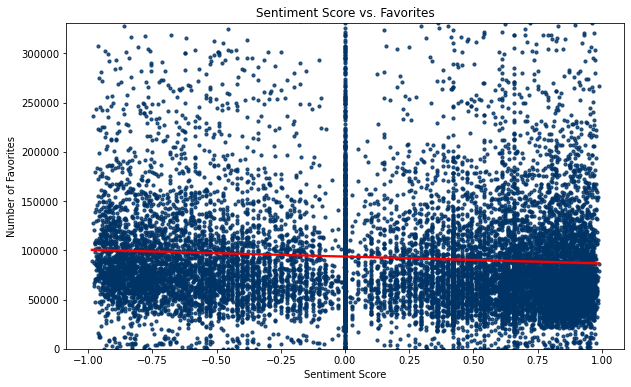

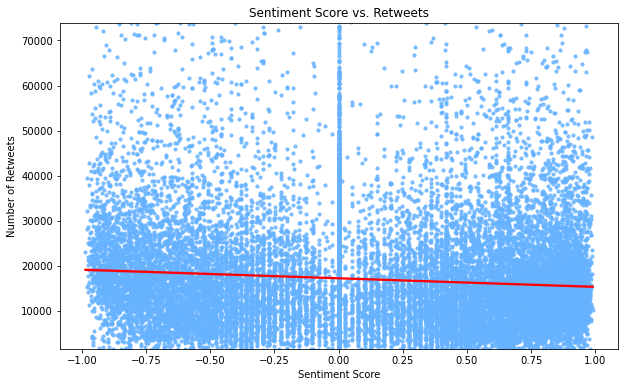

In [24]:
# favorites
plt.figure(figsize=(10, 6))
sns.regplot(x='sentiment_score', y='favorites', data=tweets[tweets['favorites'] > 0], scatter_kws={'s':10}, line_kws={'color':'red'}, color = '#003366')
plt.title('Sentiment Score vs. Favorites')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Favorites')
plt.ylim(tweets['favorites'].quantile(0.01), tweets['favorites'].quantile(0.99))  
plt.show()

# retweets
plt.figure(figsize=(10, 6))
sns.regplot(x='sentiment_score', y='retweets', data=tweets, scatter_kws={'s':10}, line_kws={'color':'red'}, color = '#66B2FF')
plt.title('Sentiment Score vs. Retweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Retweets')
plt.ylim(tweets['retweets'].quantile(0.01), tweets['retweets'].quantile(0.99))  
plt.show()

The scatter plots illustrate the relationship between sentiment scores and engagement metrics (retweets and favorites). Each dot represents a tweet, plotted based on its sentiment score and the number of retweets (top) or favorites (bottom). Both scatter plots suggest a slight negative correlation between sentiment score and engagement. Tweets with more neutral or slightly negative sentiment tend to receive more retweets and favorites. This could suggest why Donald Trump is more well known as being negative because his tweets with negative sentiment receive more engagement and are emphasized to the public. This trend could indicate that tweets with a balanced or controversial tone resonate more with the public, leading to higher engagement.

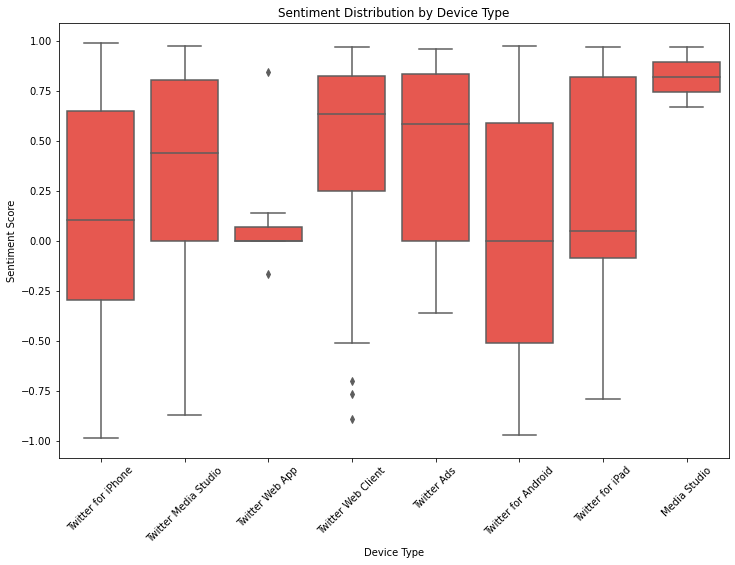

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=tweets, x='device', y='sentiment_score', color = '#ff4137')
plt.title('Sentiment Distribution by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of sentiment scores for Trump’s tweets, categorized by the device used to post them. Each box represents the interquartile range (IQR) with the median indicated by a line. The sentiment distribution varies significantly by device. For instance, tweets from the "Twitter Web Client" exhibit the most negative sentiment, while those from "Media Studio" tend to be more positive. However, they are consistently positive regardless of device. This variance might reflect the context or intent behind the tweets, with certain devices being used for specific types of messaging (official statements vs. personal opinions).

## Discussion

⁤After analyzing the data we can come to the conclusion that Donald Trump's frequent Twitter activity has had a huge impact on the public and politics. ⁤⁤Several takeaways found in this analysis include: ⁤

⁤The sentiment scores for Donald Trump's tweets vary widely from positive to negative. ⁤⁤As a result, we can observe a strong reaction from the public. ⁤⁤Interestingly, Donald Trump received the most engagement on tweets that were neutral or slightly negative. ⁤⁤This could explain why we always hear about Trump's outrageous tweets since the controversial tweets catch more attention. ⁤These shifts in sentiment over time reflect the dynamic nature of Trump's presidency and the corresponding public response. Notable events, such elections, policy announcements, or major scandals, likely drove these changes in sentiment.

The analysis of common positive and negative words provides insight into the themes associated with different sentiments. Negative words such as "fake," "bad," and "weak" suggest a focus on criticism and conflict, while positive words like "great," "thank," and "win" highlight achievements and gratitude. These themes are consistent with Trump's communication style, which often involves strong language and direct engagement with his audience, whether in praise or criticism.